In [8]:
#date: 2019-1-2
#goal: practice with pandas
#author: zp

['', '/Users/zp', '/anaconda3/lib/python37.zip', '/anaconda3/lib/python3.7', '/anaconda3/lib/python3.7/lib-dynload', '/anaconda3/lib/python3.7/site-packages', '/anaconda3/lib/python3.7/site-packages/aeosa', '/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/zp/.ipython']


In [ ]:
import sklearn
import sys
print(sys.path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

              cand_nm           contbr_nm contbr_st        contbr_employer  \
0  Bachmann, Michelle     HARVEY, WILLIAM        AL                RETIRED   
1  Bachmann, Michelle     HARVEY, WILLIAM        AL                RETIRED   
2  Bachmann, Michelle       SMITH, LANIER        AL  INFORMATION REQUESTED   
3  Bachmann, Michelle    BLEVINS, DARONDA        AR                   NONE   
4  Bachmann, Michelle  WARDENBURG, HAROLD        AR                   NONE   

       contbr_occupation  contb_receipt_amt contb_receipt_dt  
0                RETIRED              250.0        20-JUN-11  
1                RETIRED               50.0        23-JUN-11  
2  INFORMATION REQUESTED              250.0        05-JUL-11  
3                RETIRED              250.0        01-AUG-11  
4                RETIRED              300.0        20-JUN-11  
(1001733, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001733 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001733 no

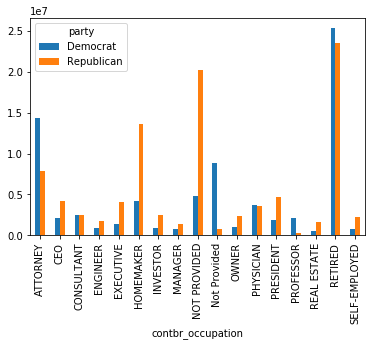

In [95]:
data_01 = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/2012USApresidentselection/data_01.csv')
print(data_01[:5])
data_02 = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/2012USApresidentselection/data_02.csv')
data_03 = pd.read_csv('/Users/zp/Desktop/data_mining/Tianchi/2012USApresidentselection/data_03.csv')
data = pd.concat([data_01, data_02, data_03],axis=0, join='outer')
print(data.shape)
data.head()
data.info()
data.describe()
# data[pd.isnull(data['contbr_employer']),:5]
pd.isna(data['contbr_employer']).head()
# data['contbr_employer'].isna().head()

data['contbr_employer'].fillna('Not Provided', inplace=True)
data['contbr_occupation'].fillna('Not Provided', inplace=True)

print(data['cand_nm'].unique())
print('there is {:.2f} candidate'.format(len(data['cand_nm'].unique())))
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
data['party'] = data['cand_nm'].map(parties)
data.head()
data['party'].value_counts()
# data['contb_receipt_amt'].groupby(data['contbr_occupation']).sum().sort_values(ascending=False).head()
# print(data[ data['contb_receipt_amt']<0 ].head())
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False).head(20)
occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}
#convert the occupation
data.contbr_occupation = data.contbr_occupation.map( lambda x: occupation_map.get(x,x) )
#convert the employer
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
data.contbr_employer = data.contbr_employer.map(lambda x: emp_mapping.get(x,x))
##select the money > 0 
data = data[data.contb_receipt_amt>0]
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False).head(20)

# datavs = data[(data.cand_nm == 'Obama, Barack') or (data.cand_nm=='Romney, Mitt'),] 
# datavs = data[ data['cand_nm'].isin (['Obama, Barack', 'Romney, Mitt']) ]
# print(datavs.shape)
# print(datavs.head())
datavs = data[ data.cand_nm.isin (['Obama, Barack', 'Romney, Mitt']) ].copy()
print(datavs.head())
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(datavs.contb_receipt_amt, bins)
print(labels.head(10))
#pivot_table
print(data.head())
by_occupation = data.pivot_table(values='contb_receipt_amt',index='contbr_occupation', columns='party', aggfunc=np.sum)
print(by_occupation.head())
over2mm = by_occupation[ by_occupation.sum(1)>2000000 ]
over2mm.head()
over2mm.plot(kind='bar')


In [120]:
print(datavs.head())
grouped = datavs.groupby('cand_nm') # 为了for循环 处理多组数据  and apply
print('grouped version')
print(grouped.head())
def get_top_amounts(group, key, n=5):
    total = group.groupby(key)['contb_receipt_amt'].sum().sort_values(ascending=False)[:n]
    return total
    
occupation = grouped.apply(get_top_amounts, 'contbr_occupation', n=7)
print(occupation)
#employer
employer = grouped.apply(get_top_amounts, 'contbr_employer')
print(employer)


          cand_nm           contbr_nm contbr_st  \
411  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
412  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
413  Romney, Mitt    CARLSEN, RICHARD        AE   
414  Romney, Mitt      DELUCA, PIERRE        AE   
415  Romney, Mitt    SARGENT, MICHAEL        AE   

                      contbr_employer          contbr_occupation  \
411                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
412                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
413       DEFENSE INTELLIGENCE AGENCY       INTELLIGENCE ANALYST   
414                             CISCO                   ENGINEER   
415  RAYTHEON TECHNICAL SERVICES CORP  COMPUTER SYSTEMS ENGINEER   

     contb_receipt_amt contb_receipt_dt       party  
411               25.0        01-FEB-12  Republican  
412              110.0        01-FEB-12  Republican  
413              250.0        13-APR-12  Republican  
414               30.0        21-AUG-11  Republican  
415           

          cand_nm           contbr_nm contbr_st  \
411  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
412  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
413  Romney, Mitt    CARLSEN, RICHARD        AE   
414  Romney, Mitt      DELUCA, PIERRE        AE   
415  Romney, Mitt    SARGENT, MICHAEL        AE   

                      contbr_employer          contbr_occupation  \
411                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
412                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
413       DEFENSE INTELLIGENCE AGENCY       INTELLIGENCE ANALYST   
414                             CISCO                   ENGINEER   
415  RAYTHEON TECHNICAL SERVICES CORP  COMPUTER SYSTEMS ENGINEER   

     contb_receipt_amt contb_receipt_dt       party  
411               25.0        01-FEB-12  Republican  
412              110.0        01-FEB-12  Republican  
413              250.0        13-APR-12  Republican  
414               30.0        21-AUG-11  Republican  
415           

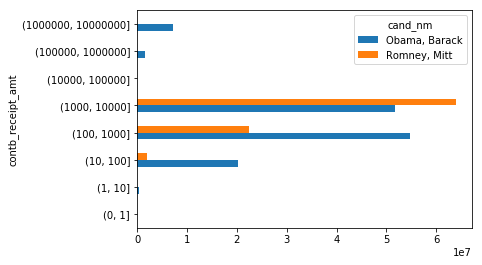

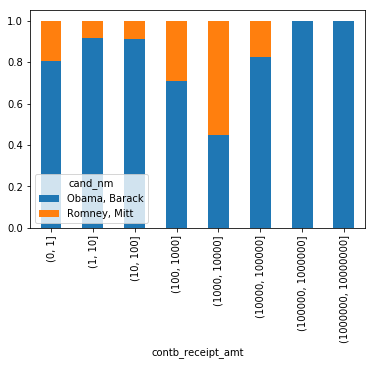

In [169]:
print(datavs[:5])
print(labels[:5])
grouped_bins = datavs.groupby(['cand_nm',labels])
# grouped_bins = datavs.groupby(['cand_nm',labels])['contb_receipt_amt'].sum().unstack()
# print(grouped_bins)
# print(grouped_bins.head())
bucket_sum = grouped_bins['contb_receipt_amt'].sum().unstack(0)
print(bucket_sum)
bucket_sum.plot(kind='barh')
print(bucket_sum.sum(axis=1))
normed_sum = bucket_sum.div( bucket_sum.sum(axis=1), axis=0 )
print(normed_sum)
normed_sum.plot(kind='bar',stacked=True)
# print(grouped_bins.size().unstack().T)
# print(grouped_bins.size().unstack(0))


In [136]:
#two ways   /// compare pivot_table and groupby
print(data.head())
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
print(by_occupation.head())

new = data.groupby(['contbr_occupation','party'])['contb_receipt_amt'].sum()
print(new.head())
print(new.unstack().head())

              cand_nm           contbr_nm contbr_st contbr_employer  \
0  Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
1  Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
2  Bachmann, Michelle       SMITH, LANIER        AL    NOT PROVIDED   
3  Bachmann, Michelle    BLEVINS, DARONDA        AR            NONE   
4  Bachmann, Michelle  WARDENBURG, HAROLD        AR            NONE   

  contbr_occupation  contb_receipt_amt contb_receipt_dt       party  
0           RETIRED              250.0        20-JUN-11  Republican  
1           RETIRED               50.0        23-JUN-11  Republican  
2      NOT PROVIDED              250.0        05-JUL-11  Republican  
3           RETIRED              250.0        01-AUG-11  Republican  
4           RETIRED              300.0        20-JUN-11  Republican  
party                                Democrat  Republican
contbr_occupation                                        
   MIXED-MEDIA ARTIST / STORYTELLER  

In [194]:
print(data.head())
print(np.shape(data))
print(data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:5])
# print(data.groupby('contbr_nm')['contbr_nm'].value_counts(ascending=False)[:5])
temp = data.groupby('contbr_nm')
# print(pd.DataFrame(temp['contbr_nm']).value_counts(ascending=False))
# print(data['contbr_nm'].value_counts(ascending=False)[:5])

              cand_nm           contbr_nm contbr_st contbr_employer  \
0  Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
1  Bachmann, Michelle     HARVEY, WILLIAM        AL         RETIRED   
2  Bachmann, Michelle       SMITH, LANIER        AL    NOT PROVIDED   
3  Bachmann, Michelle    BLEVINS, DARONDA        AR            NONE   
4  Bachmann, Michelle  WARDENBURG, HAROLD        AR            NONE   

  contbr_occupation  contb_receipt_amt contb_receipt_dt       party  
0           RETIRED              250.0        20-JUN-11  Republican  
1           RETIRED               50.0        23-JUN-11  Republican  
2      NOT PROVIDED              250.0        05-JUL-11  Republican  
3           RETIRED              250.0        01-AUG-11  Republican  
4           RETIRED              300.0        20-JUN-11  Republican  
(991477, 8)
contbr_nm
WILLIAMS, DEBBY         205
BERKE, DAVID MICHAEL    171
SEBAG, DAVID            161
SMITH, ERIK             145
FALLSGRAFF, TOBY   

In [205]:
a = [3,5,6]
b = pd.DataFrame(a)
print(b)
print('count')
print(b[0].count().sort_values())
print('value_counts')
print(b[0].value_counts())
# print(a.count())

   0
0  3
1  5
2  6
count


AttributeError: 'numpy.int64' object has no attribute 'sort_values'

In [222]:
# print(datavs.head())
datavs['time'] = pd.to_datetime(datavs['contb_receipt_dt'])
print(datavs.head())
datavs.set_index('time',inplace=True)

          cand_nm           contbr_nm contbr_st  \
411  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
412  Romney, Mitt  ELDERBAUM, WILLIAM        AA   
413  Romney, Mitt    CARLSEN, RICHARD        AE   
414  Romney, Mitt      DELUCA, PIERRE        AE   
415  Romney, Mitt    SARGENT, MICHAEL        AE   

                      contbr_employer          contbr_occupation  \
411                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
412                     US GOVERNMENT    FOREIGN SERVICE OFFICER   
413       DEFENSE INTELLIGENCE AGENCY       INTELLIGENCE ANALYST   
414                             CISCO                   ENGINEER   
415  RAYTHEON TECHNICAL SERVICES CORP  COMPUTER SYSTEMS ENGINEER   

     contb_receipt_amt contb_receipt_dt       party       time  
411               25.0        01-FEB-12  Republican 2012-02-01  
412              110.0        01-FEB-12  Republican 2012-02-01  
413              250.0        13-APR-12  Republican 2012-04-13  
414               30.0  

In [228]:
vs_time = datavs.groupby('cand_nm').resample('M')['cand_nm'].count()
print(vs_time.unstack(0))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [233]:
help(pd.resample())

AttributeError: module 'pandas' has no attribute 'resample'